<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">XGBoost</h3>
    <h4 align="center"><a href="http://www.linkedin.com/in/sajjad-shurgashti-bb7684326">Sajjad Shurkeshti</a></h5>
</div>

<img src = "https://thinkingneuron.com/wp-content/uploads/2019/09/image-3.png" width=45%>

<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/XGBoost_logo.png/330px-XGBoost_logo.png" width=40%>

# Topics:

- [ ] What is XGBoost (Review)
- [ ] XGBoost in action (Regression)

## What is XGBoost?

eXtreme Gradient Boosting (XGBoost) is a scalable and improved version of the gradient boosting algorithm (terminology alert) designed for efficacy, computational speed and model performance. It is an open-source library and a part of the Distributed Machine Learning Community. XGBoost is a perfect blend of software and hardware capabilities designed to enhance existing boosting techniques with accuracy in the shortest amount of time.

What makes XGBoost a go-to algorithm for winning Machine Learning and Kaggle competitions?

<img src = "https://miro.medium.com/max/3280/1*1kjLMDQMufaQoS-nNJfg1Q.png" width=80%>

# XGBoost in Action (Regression)

## Importing the libraries

In [ ]:
# !pip install xgboost

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

C:\Users\soso\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## Load and Prepare Data

* Dataset We will be using a dataset that encapsulates the carbon dioxide emissions generated from burning coal for producing electricity power in the United States of America between 1973 and 2016. Using XGBoost, we will try to predict the carbon dioxide emissions in jupyter notebook for the next few years.

In [ ]:
#Read the dataset and print the top 5 elements of the dataset
data = pd.read_csv('CO2.csv')
data.head(5)

,YYYYMM,Value
0,197301,72.076
1,197302,64.442
2,197303,64.084
3,197304,60.842
4,197305,61.798


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YYYYMM  523 non-null    int64  
 1   Value   523 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.3 KB


We use Pandas to import the CSV file. We notice that the dataframe contains a column 'YYYYMM' that needs to be separated into 'Year' and 'Month' column. In this step, we will also remove any null values that we may have in the dataframe. Finally, we will retrieve the last five elements of the dataframe to check if our code worked. And it did!

In [ ]:
data['Month'] = data.YYYYMM.astype(str).str[4:6].astype(float)
data['Year'] = data.YYYYMM.astype(str).str[0:4].astype(float)

In [ ]:
data.shape

(523, 4)

In [ ]:
data.drop(['YYYYMM'], axis=1, inplace=True)
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.tail(5)

,Value,Month,Year
518,72.840,3.0,2016.0
519,71.410,4.0,2016.0
520,82.510,5.0,2016.0
521,115.772,6.0,2016.0
522,135.958,7.0,2016.0


In [ ]:
# check for data type
print(data.dtypes)

Value    float64
Month    float64
Year     float64
dtype: object


In [ ]:
data.isnull().sum()

Value    0
Month    0
Year     0
dtype: int64

In [ ]:
data.shape

(523, 3)

In [ ]:
X = data.loc[:,['Month', 'Year']].values
y = data.loc[:,'Value'].values

In [ ]:
y

array([ 72.076,  64.442,  64.084,  60.842,  61.798,  66.538,  72.626,
        75.181,  68.397,  67.668,  67.021,  71.118,  70.55 ,  62.929,
        64.519,  60.544,  64.687,  64.736,  73.698,  72.559,  63.221,
        65.418,  65.593,  71.677,  72.708,  65.117,  66.532,  61.975,
        62.031,  67.875,  74.184,  77.029,  66.156,  66.651,  67.625,
        75.857,  81.264,  71.058,  73.361,  68.703,  68.985,  73.936,
        80.968,  81.962,  72.95 ,  74.746,  78.924,  84.49 ,  87.215,
        75.943,  75.092,  68.641,  74.916,  80.942,  90.667,  89.046,
        80.975,  77.369,  78.058,  83.279,  85.191,  71.476,  67.829,
        69.051,  74.201,  81.372,  88.003,  91.836,  85.066,  79.494,
        79.291,  87.107,  93.946,  83.91 ,  83.689,  78.077,  83.19 ,
        88.15 ,  96.579,  97.246,  84.463,  86.071,  86.09 ,  94.293,
       100.568,  94.862,  93.21 ,  81.245,  82.785,  91.484, 107.126,
       106.245,  95.662,  90.03 ,  91.239, 102.138, 108.164,  94.766,
        95.724,  86.

In [ ]:
data_dmatrix = xgb.DMatrix(X,label=y)

In [ ]:
data_dmatrix

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(418, 2)
(418,)
(105, 2)
(105,)


In [ ]:
reg_mod = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.08,
    subsample=0.75,
    colsample_bytree=1,
    max_depth=7,
    gamma=0,
)
reg_mod.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.08, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.75,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
#After training the model, we'll check the model training score.
scores = cross_val_score(reg_mod, X_train, y_train,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.98


In [ ]:
reg_mod.fit(X_train,y_train)

predictions = reg_mod.predict(X_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE: %f" % (rmse))

RMSE: 4.263376


In [ ]:
from sklearn.metrics import r2_score
r2 = np.sqrt(r2_score(y_test, predictions))
print("R_Squared Score : %f" % (r2))

R_Squared Score : 0.990117


* As you can see, the these statistical metrics have reinstated our confidence about this model. RMSE ~ 4.95 R-Squared Score ~ 98.8% Now, let's visualize the original data set using the seaborn library.

<AxesSubplot:xlabel='Year', ylabel='Value'>

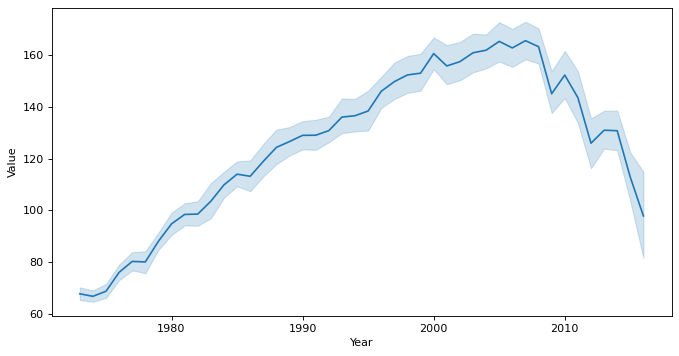

In [ ]:
plt.figure(figsize=(10, 5), dpi=80)
sns.lineplot(x='Year', y='Value', data=data)

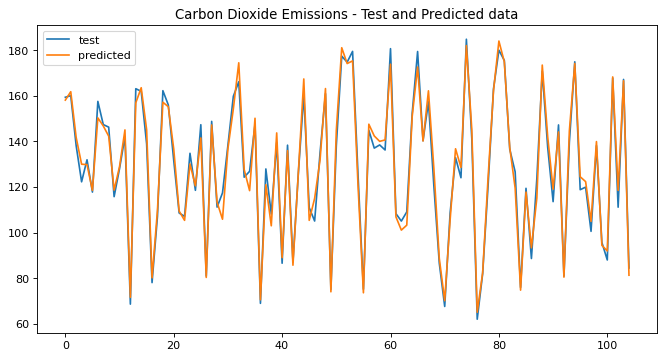

In [ ]:
plt.figure(figsize=(10, 5), dpi=80)
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="test")
plt.plot(x_ax, predictions, label="predicted")
plt.title("Carbon Dioxide Emissions - Test and Predicted data")
plt.legend()
plt.show()

Finally, the last piece of code will print the forecasted carbon dioxide emissions until 2025.

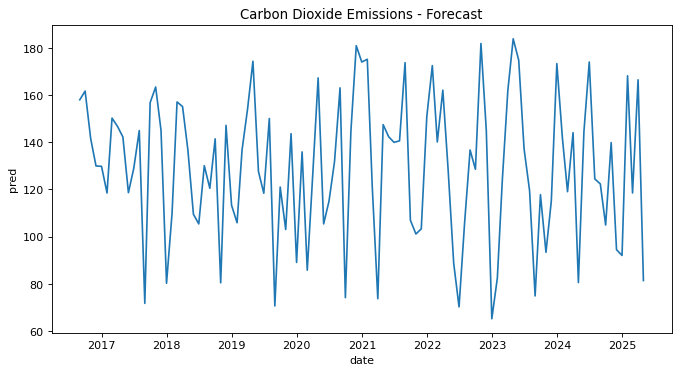

In [ ]:
plt.figure(figsize=(10, 5), dpi=80)
df=pd.DataFrame(predictions, columns=['pred'])
df['date'] = pd.date_range(start='8/1/2016', periods=len(df), freq='M')
sns.lineplot(x='date', y='pred', data=df)
plt.title("Carbon Dioxide Emissions - Forecast")
plt.show()